In [2]:
!pip install fastai2
from fastai2.vision.all import *

     |████████████████████████████████| 184kB 2.6MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = Path('/content/drive/My Drive/Levis')
path_modal = path /'multimodal-search'

In [0]:
levis_labels = pd.read_csv(path_modal/'levis_multilabels_cleaned.csv')

In [6]:
levis_labels.head()

,file_path,label
0,downloaded_images/748790000___748790000-back-pdp.jpg,551 customized
1,downloaded_images/748790000___748790000-side-pdp.jpg,551 customized
2,downloaded_images/748790000___748790000-alt6-pdp.jpg,551 customized
3,downloaded_images/748790000___748790000-front-pdp.jpg,551 customized
4,downloaded_images/181810426___181810426-front-pdp.jpg,541 athletic taper camo patch


In [0]:
dls = ImageDataLoaders.from_df(levis_labels, path_modal, label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

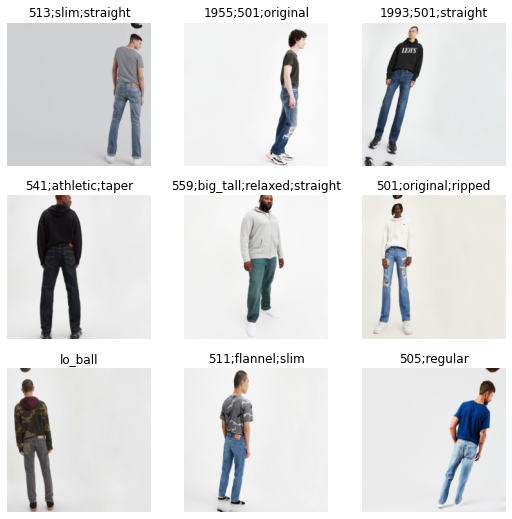

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5)])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.033113110810518265)

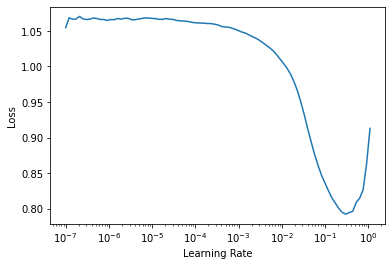

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(4, 3e-2)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.978746,1.102734,0.599854,05:45


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.623847,22.530420,0.643567,06:36
1,0.444285,8.443411,0.897953,06:37
2,0.344654,1.891917,0.949708,06:37
3,0.293673,0.289332,0.951754,06:39


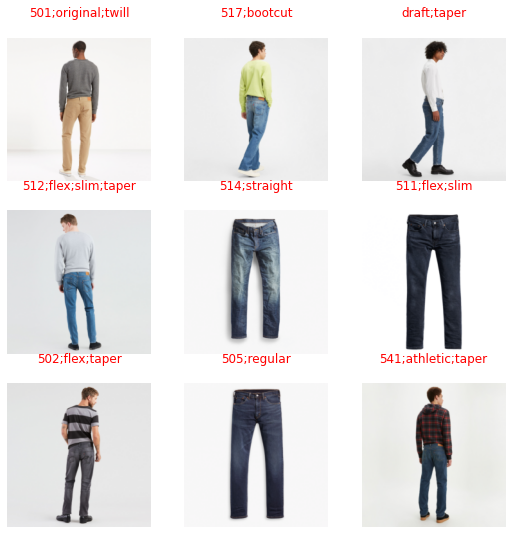

In [11]:
learn.show_results()

In [0]:
learn.save('levis-stage-ai2-rn50-512')
learn.save('levis-stage-ai2-rn50-512-torch',with_opt=False)

In [15]:
learn.path

Path('/content/drive/My Drive/Levis/multimodal-search')

In [20]:
learn.predict(path_modal/'test/502_taper.jpg')

((#1) ['slim'],
 tensor([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
          True, False, False, False, False, False, False, False, False, False]),
 tensor([0.0038, 0.0260, 0.0112, 0.0418, 0.0354, 0.0049, 0.0110, 0.0193, 0.0466,
         0.1973, 0.0529, 0.0089, 0.0467, 0.3162, 0.1951, 0.0131, 0.0176, 0.0171,
         0.0113, 0.0318, 0.0576, 0.0116, 0.0207, 0.0061, 0.0281, 0.0290, 0.0169,
         0.0573, 0.0277, 0.0687, 0.0262, 0.0034, 0.0230, 0.0105, 0.0057, 0.0168,
         0.2656, 0.0069, 0.0157, 0.0115, 0.0080, 0.0124, 0.0393, 0.1832, 0.0150,
         0.0308, 0.0151, 0.0216, 0.0036, 0.0255, 0.5494, 0.0188, 0.1162, 0.1955,
         0.1818, 0.026

,target,predicted,probabilities,loss
0,512;slim;taper,1954;original,"tensor([1.6733e-33, 0.0000e+00, 9.9999e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4126e-02, 0.0000e+00, 2.3581e-36,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 1.0000e+00, 0.0000e+00, 4.7496e-35, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])",9.705828666687012
1,hi_ball,1954;original,"tensor([1.6251e-17, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0664e-32, 1.0190e-30,\n 0.0000e+00, 4.3574e-23, 0.0000e+00, 4.4448e-03, 0.0000e+00, 5.0855e-21,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4167e-36, 0.0000e+00, 1.0381e-37,\n 4.9655e-29, 0.0000e+00, 0.0000e+00, 7.5271e-39, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5924e-26, 1.5254e-38, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2741e-36, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 2.1526e-26, 2.1093e-24, 0.0000e+00, 2.4468e-30,\n 0.0000e+00, 9.9408e-01, 4.0828e-31, 1.1361e-20, 0.0000e+00, 2.9790e-31,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 1.4589e-32, 5.1533e-21, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])",2.9660990238189697
2,lo_ball,1954;original,"tensor([3.8610e-26, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 2.1359e-33, 0.0000e+00, 6.7412e-03, 0.0000e+00, 4.9851e-30,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5584e-37, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5763e-37, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 9.9993e-01, 0.0000e+00, 5.1110e-29, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,\n 0.0000e+00, 1.5073e-31, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])",2.0798871517181396
3,501;jogger;original,1954,"tensor([3.8631e-06, 4.6308e-20, 8.6056e-01, 2.5985e-19, 2.6453e-12, 1.2675e-10,\n 5.6613e-19, 4.8423e-09, 3.6900e-23, 8.7999e-03, 1.1930e-18, 2.3973e-07,\n 3.3500e-19, 1.3980e-19, 1.8005e-26, 6.5902e-13, 8.2388e-13, 1.1986e-13,\n 2.1650e-10, 1.2150e-14, 3.9634e-14, 3.0629e-13, 3.3693e-24, 1.2068e-13,\n 4.7719e-25, 1.6267e-29, 2.4582e-17, 1.9589e-09, 5.8365e-14, 3.8146e-27,\n 2.0416e-19, 5.5410e-14, 6.4397e-26, 4.3154e-13, 3.4939e-15, 2.6624e-18,\n 2.3286e-18, 1.3253e-22, 4.0803e-10, 3.8397e-09, 6.0483e-14, 3.4892e-11,\n 3.1040e-20, 1.0036e-01, 1.3696e-11, 1.3145e-07, 7.6987e-19, 1.6106e-11,\n 1.0149e-15, 2.2970e-17, 1.4157e-14, 2.5200e-16, 2.2179e-13, 4.8687e-17,\n 4.7320e-11, 1.1455e-08, 2.1038e-16, 5.6457e-18, 6.3605e-24, 6.7094e-20])",0.5103638172149658
4,512;flex;slim;taper,taper,"tensor([4.4688e-03, 5.6763e-04, 1.9880e-03, 1.3824e-03, 1.0740e-04, 7.0447e-03,\n 8.1724e-04, 3.5221e-04, 2.0496e-04, 5.0314e-02, 8.9416e-03, 4.3165e-02,\n 3.3426e-03, 2.7034e-03, 1.1803e-04, 8.4289e-04, 1.9916e-02, 3.3121e-04,\n 1.1173e-03, 6.1211e-04, 5.7599e-03, 7.2612e-04, 7.8009e-04, 4.1638e-03,\n 2.5569e-04, 7.2392e-04, 7.1970e-04, 7.5491e-03, 8.6769e-04, 2.2680e-02,\n 6.5126e-04, 4.1445e-04, 2.4843e-04, 4.8895e-04, 4.4910e-04, 5.1988e-04,\n 3.0116e-02, 1.2592e-03, 1.2741e-03, 1.8205e-03, 1.6268e-03, 4.3019e-04,\n 4.7037e-04, 2.7760e-02, 1.4179e-04, 4.1292e-02, 9.6645e-03, 9.2919e-05,\n 1.7429e-03, 1.9079e-03, 1.8196e-02, 3.2791e-04, 5.0005e-02, 2.5450e-04,\n 5.0928e-01, 5.2631e-04, 3.7096e-04, 7.4610e-04, 1.5853e-03, 9.3054e-05])",0.2928775

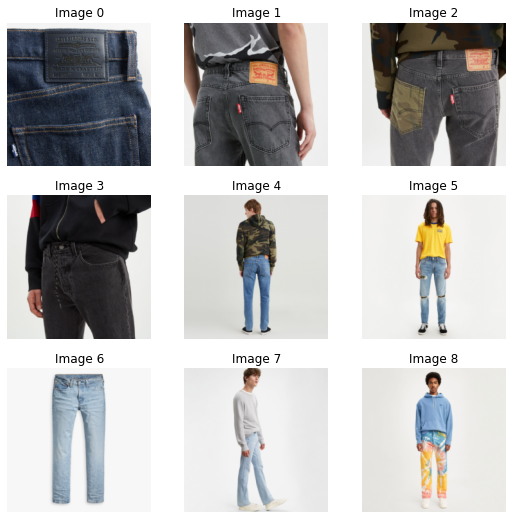

In [19]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)